# Pair Programming Intro Regresión Lineal

## Ana C y Ana G

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el 

pairprgramming de codificicación (este csv debería tener las variables **estadandarizas**).

El **objetivo** de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que:

- Deberéis separar la X y la y.
- Deberéis crear el train y el test.
- Ajustar vuestro modelo.

In [37]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [2]:
df=pd.read_csv('../data/08-primas_categorizadas_normalizadas.csv',index_col=0)
df.head()

,age,sex,bmi,children,smoker,region,charges_Sklearn,fumadores,hombres,northeast,northwest,southeast,southwest
0,-1.387916,female,-0.382685,-0.885991,yes,southwest,0.836552,1,0,0.0,0.0,0.0,1.0
1,-1.459488,male,0.601634,-0.069805,no,southeast,0.032037,0,1,0.0,0.0,1.0,0.0
2,-0.743769,male,0.472516,1.562566,no,southeast,0.176597,0,1,0.0,0.0,1.0,0.0
3,-0.457482,male,-0.218352,-0.885991,no,northwest,0.145677,0,1,0.0,1.0,0.0,0.0
4,-0.529054,female,-0.744888,-0.885991,no,southeast,0.139827,0,0,0.0,0.0,1.0,0.0


In [3]:
numericas = df.select_dtypes(np.number)

In [4]:
numericas.head(2)

,age,bmi,children,charges_Sklearn,fumadores,hombres,northeast,northwest,southeast,southwest
0,-1.387916,-0.382685,-0.885991,0.836552,1,0,0.0,0.0,0.0,1.0
1,-1.459488,0.601634,-0.069805,0.032037,0,1,0.0,0.0,1.0,0.0


In [5]:
X = numericas.drop(['charges_Sklearn','northeast','northwest','southeast','southwest'], axis = 1)#predictoras
y = df["charges_Sklearn"]# respuestas

In [6]:
# comprobemos que es ahora X, deberían ser todas las columnas de las variables predictoras
X.head(3)

,age,bmi,children,fumadores,hombres
0,-1.387916,-0.382685,-0.885991,1,0
1,-1.459488,0.601634,-0.069805,0,1
2,-0.743769,0.472516,1.562566,0,1


In [7]:
y.head(3)

0    0.836552
1    0.032037
2    0.176597
Name: charges_Sklearn, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# iniciamos la regresión lineal. n_jobs hace referencia al número de nucleos 
# que usaremos de nuestro ordenador. Al indicar -1 significa que los usaremos todos. 
lr = LinearRegression(n_jobs=-1)

In [10]:
# fiteamos el modelo, lo que significa que le pasamos los datos de entrenamiento para que aprenda el algoritmo. 
# Fijaros que para que aprenda, les paso solo los datos de entrenamiento
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [11]:
# es el momento de hacer las predicciones, para eso usarmos el método predict() de sklearn 

y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) # hacemos las predicciones para las casas que tenemos en los datos de test

In [12]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
72,0.483175,0.505128,Train
903,0.109029,0.133858,Train
44,0.159836,0.191624,Train
309,0.820715,0.057399,Train
788,0.345104,0.397195,Train


In [13]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
72,0.483175,0.505128,Train,-0.021953
903,0.109029,0.133858,Train,-0.024830
44,0.159836,0.191624,Train,-0.031788
309,0.820715,0.057399,Train,0.763316
788,0.345104,0.397195,Train,-0.052091


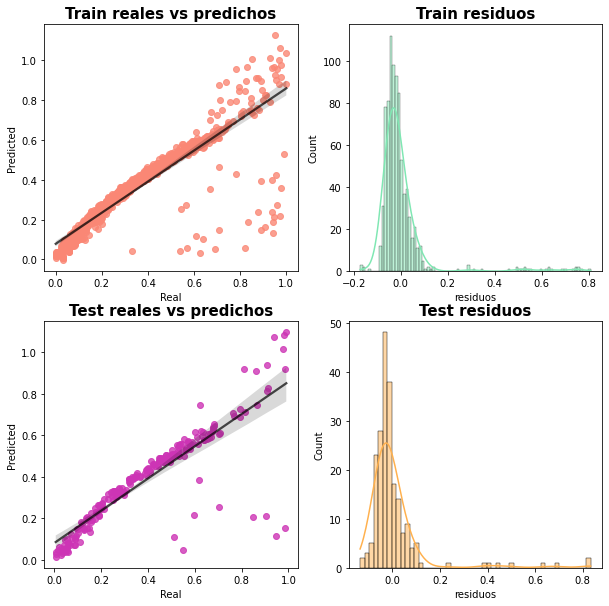

In [14]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "#fa8775",
            line_kws = {"color": "black", "alpha": 0.7 })
sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "#cd34b5",
            line_kws = {"color": "black", "alpha": 0.7 }, 
            ax = ax[1,0])
# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="#80e7b3",
             kde=True, 
             ax = ax[0,1])
sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "#ffb14e",
             kde=True, 
             ax = ax[1,1])
ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

---

# Cross - Validation

In [15]:
# Validación cruzada repetida con una única métrica
# ==============================================================================
cv_scores = cross_val_score(
                estimator = LinearRegression(), # que algoritmo  queremos usar para ajustar el modelo
                X         = X, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
                y         = y, # cual es nuestra variable y
                scoring   = 'neg_root_mean_squared_error', # que métrica queremos calcular
                cv        = 10 # número de veces que queremos hacer la validación
             )

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-0.04994064 -0.09504794 -0.1649795  -0.11969868 -0.12069935 -0.08417453
 -0.08665511 -0.10445007 -0.19207594 -0.12105505]
Média métricas de validación cruzada: -0.11387768097728634


In [16]:
# para saber que métricas podemos usar: 

metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [17]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================

cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'), #seleccionamos estas métricas del diccionario anterior
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.010780,0.006085,0.961149,-0.049941
1,0.018275,0.011410,0.862403,-0.095048
2,0.015373,0.005228,0.535785,-0.164980
3,0.017425,0.011345,0.791140,-0.119699
4,0.010578,0.004181,0.724553,-0.120699
5,0.011198,0.004675,0.891380,-0.084175
6,0.015742,0.004385,0.877185,-0.086655
7,0.012042,0.003434,0.821889,-0.104450
8,0.015596,0.005303,0.412226,-0.192076
9,0.027133,0.006112,0.757371,-0.121055


In [18]:
cv_scores['test_r2'].unique()

array([0.96114875, 0.86240313, 0.53578461, 0.79114012, 0.72455314,
       0.89138016, 0.87718454, 0.82188869, 0.41222635, 0.75737124])

In [19]:
# calculamos la media para cada una de las métricas

print(f'la media para el r2 es {cv_scores["test_r2"].mean()}')
print(f'la media para el RMSE es {abs(cv_scores["test_neg_root_mean_squared_error"].mean())}')

la media para el r2 es 0.7635080728311759
la media para el RMSE es 0.1138776809772863


---

Decidimos usar el también el dataframe de primas altas para ver si hay diferencias y practicar, está sin normalizar.

In [20]:
df1=pd.read_csv('../data/04-primas_altas.csv',index_col=0)
df1.head()

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700


Categorizamos fumadores

In [21]:
mapa = {'no':0, 'yes':1} 

In [22]:
df1["fumadores"] = df1["smoker"].map(mapa)

In [23]:
df1.head()

,age,sex,bmi,children,smoker,region,charges,fumadores
3,33,male,22.705,0,no,northwest,21984.47061,0
9,60,female,25.840,0,no,northwest,28923.13692,0
11,62,female,26.290,0,yes,southeast,27808.72510,1
14,27,male,42.130,0,yes,southeast,39611.75770,1
19,30,male,35.300,0,yes,southwest,36837.46700,1


In [24]:
dummies = pd.get_dummies(df1["sex"], prefix_sep = "_", prefix = "sex", dtype = int)
dummies.head(2)

,sex_female,sex_male
3,0,1
9,1,0


In [25]:
df_dummies = pd.concat([df1, dummies], axis = 1)
df_dummies.head(2)

,age,sex,bmi,children,smoker,region,charges,fumadores,sex_female,sex_male
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1
9,60,female,25.840,0,no,northwest,28923.13692,0,1,0


Estandarizamos con Sklearn RobustScaler

In [43]:
numericas2=df_dummies.select_dtypes(np.number)

In [44]:
# construir el modelo de escalador
robust = RobustScaler()

In [45]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(numericas2)

RobustScaler()

In [46]:
# transformamos los datos
X_robust = robust.transform(numericas2)

In [48]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_robust = pd.DataFrame(X_robust, columns = numericas2.columns)
numericas_robust.head(2)

,age,bmi,children,charges,fumadores,sex_female,sex_male
0,-0.545455,-1.104916,-0.5,-0.791564,-1.0,0.0,0.0
1,0.681818,-0.729017,-0.5,-0.362308,-1.0,1.0,-1.0


In [42]:
for columna in numericas_robust.columns:
    print(f'La media de la columna {columna} es:  {numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_robust[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna age es:  -0.11555111555111558
La desviación estándar de la columna age es: 0.629787000514216
-------------------------------------------------------------
La media de la columna bmi es:  0.023141926019623636
La desviación estándar de la columna bmi es: 0.6879212286351009
-------------------------------------------------------------
La media de la columna children es:  0.06776556776556776
La desviación estándar de la columna children es: 0.5622837394616739
-------------------------------------------------------------
La media de la columna charges es:  -0.049151597199839483
La desviación estándar de la columna charges es: 0.5958323938188549
-------------------------------------------------------------
La media de la columna fumadores es:  -0.22344322344322345
La desviación estándar de la columna fumadores es: 0.41731795683321943
-------------------------------------------------------------
La media de la columna sex_female es:  0.42124542124542125
La desviación es

Vamos a entrenar el modelo y valorarlo

In [49]:
X = df_dummies.select_dtypes(np.number).drop('charges',axis=1) #predictoras
y = df1["charges"]# respuestas

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
lr = LinearRegression(n_jobs=-1)

In [52]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [53]:
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test)

In [54]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
140,27375.90478,16140.444112,Train
947,39047.28500,37100.920018,Train
682,40103.89000,38405.561421,Train
1007,24915.22085,32055.224694,Train
158,36950.25670,37700.338084,Train


In [55]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
140,27375.90478,16140.444112,Train,11235.460668
947,39047.28500,37100.920018,Train,1946.364982
682,40103.89000,38405.561421,Train,1698.328579
1007,24915.22085,32055.224694,Train,-7140.003844
158,36950.25670,37700.338084,Train,-750.081384


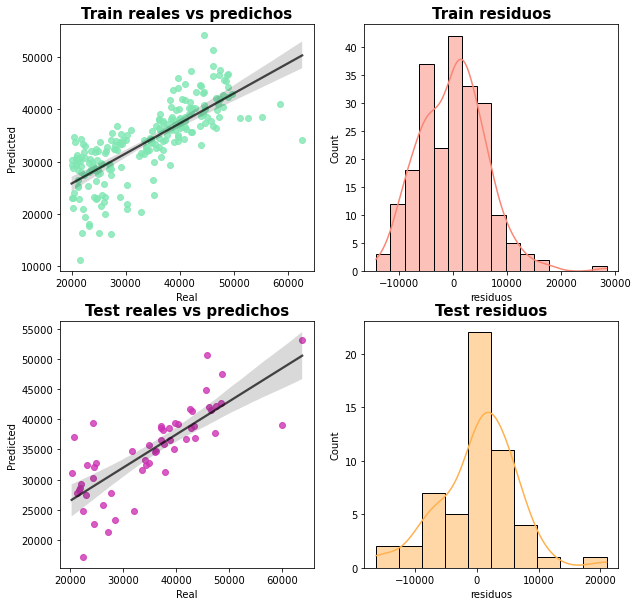

In [56]:
fig, ax = plt.subplots(2,2,figsize=(10,10))

# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "#80e7b3",
            line_kws = {"color": "black", "alpha": 0.7 })
sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "#cd34b5",
            line_kws = {"color": "black", "alpha": 0.7 }, 
            ax = ax[1,0])
#----------------------------------------------------------------------
# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="#fa8775",
             kde=True, 
             ax = ax[0,1])
sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "#ffb14e",
             kde=True, 
             ax = ax[1,1])
#-------------------------------------------------------------------------------
ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
#--------------------------------------------------------------------------------------
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");


In [58]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================

cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'), #seleccionamos estas métricas del diccionario anterior
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.013661,0.005209,0.599522,-5672.055629
1,0.009704,0.004748,0.316848,-7151.205519
2,0.005996,0.006147,0.737560,-5169.841173
3,0.006141,0.003013,0.438962,-6297.312340
4,0.003732,0.010431,0.689597,-6155.573128
5,0.004168,0.002666,0.539491,-5956.399069
6,0.011645,0.003282,0.608473,-5456.996606
7,0.010141,0.003098,0.531404,-5839.335229
8,0.004634,0.003757,0.553971,-5943.455846
9,0.007129,0.002022,0.467104,-8420.930360


In [59]:
# calculamos la media para cada una de las métricas

print(f'la media para el r2 es {cv_scores["test_r2"].mean()}')
print(f'la media para el RMSE es {abs(cv_scores["test_neg_root_mean_squared_error"].mean())}')

la media para el r2 es 0.5482932021747324
la media para el RMSE es 6206.3104898693


---

# Conclusiones

Nos damos cuenta en nuestro primer intento que nuestro modelo funciona, aunque no hace unas prediciones perfectas, vemos que nuestros residuos se situan cerca del cero , tanto para el training como para el test. Segun nuestra distribucion de datos incial habria que ajustar el corte de df original , en torno a los 15.000 en lugar de los 20.000 que elegimos para quitar el ruido que suponemos viene de los fumadores, que empiezan a aparecer a partir de esas primas.

En el segundo vemos que tiene un bajo valor predictivo, en este caso tenemos una n mucho mas pequeña , pero nuestros datos no estan ni normalizados , y segun nuesro estudio incial, en este rango de primas, las primas mas bajas corresponden a los fumadores y las mas altas estan relacionadas con la edad, tendriamos que valorar volver a dividirlo.

In [60]:
df_dummies.to_csv('../data/09-primas-altas.csv')